# Chapter 8 exercise

The equation can be written out using the central differences formula as:

\begin{equation*}
\frac{\phi_{i-1}-2\phi_i+\phi_{i+1}}{h^2}+\frac{1}{r_i}\frac{\phi_{i+1}-\phi_{i-1}}{2h}=0
\end{equation*}

which rearranges to

\begin{equation*}
\phi_i=\frac{\left(r_i-\frac{h}{2}\right)\phi_{i-1}+\left(r_i+\frac{h}{2}\right)\phi_{i+1}}{2r_i}
\end{equation*}

This can be applied as follows

converged after 2204 iterations


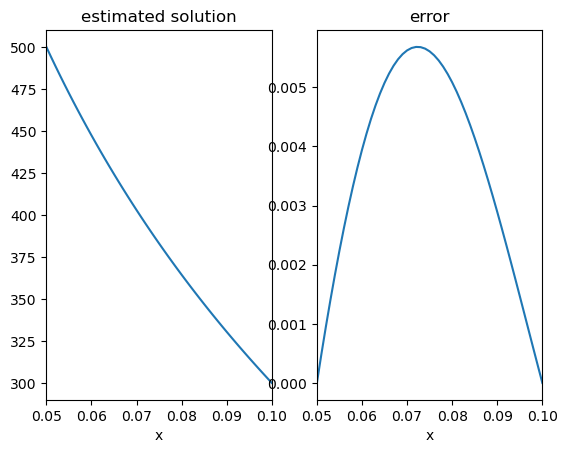

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n=51;                          #We are using 51 points
r = np.linspace(0.05,0.10,n)   #Construct the radial coordinate
h =r[2]-r[1]                     

#Set up the initial grid :
F0 = 400*np.ones(n)       # The temp avg is a suitable choice
F0[0]=500; F0[-1]=300     # Enforce boundary conditions

F1 = np.zeros(F0.shape)   #Initialize

tol=1e-4                  #Error tolerance
err=1                     #Initialise
n=0
while err>tol:
  F1[:]=F0[:]                  #Make an array copy
  n+=1
  for i in range(1,len(F1)-1):
    F1[i] = ((r[i]-h/2)*F1[i-1]+(r[i]+h/2)*F1[i+1])/2/r[i]; 
  err = np.linalg.norm(F1-F0)  #Error
  F0[:]=F1[:]                  #Re-initialise

print('converged after',n, 'iterations')
# Plot and compare to the analytic solution

a=-200/np.log(2); b=500-200*np.log(20)/np.log(2);
Fanalytic= a*np.log(r)+b;

fig,ax = plt.subplots(1,2)
ax[0].plot(r,F1)
ax[0].set_title('estimated solution')
ax[1].plot(r,np.abs(F1-Fanalytic))
ax[1].set_title('error')

ax[0].set_xlim([0.05,0.1])
ax[0].set_xlabel('x')
ax[1].set_xlim([0.05,0.1])
ax[1].set_xlabel('x')

plt.show()

At such small step sizes it is the tolerance that dictates the size of the error rather than the step size. Try decreasing the tolerance to `1e-8` and observe the effect on the error.

Also observe that as the step size is decreased, many more iterations are required for the solution to converge.


With an over-relaxation parameter of `g=1.88` the solution requires 246 iterations to converge to within a tolerance of `1e-8`. This is about 20 times less than with no relaxation (g=1).

converged after 244 iterations


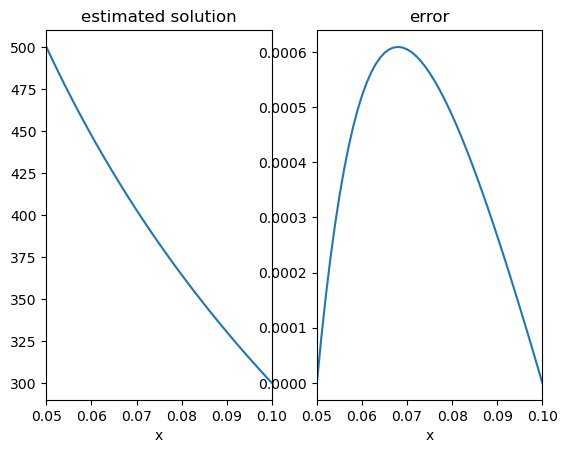

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n=51;                          #We are using 51 points
r = np.linspace(0.05,0.10,n)   #Construct the radial coordinate
h =r[2]-r[1]                     

#Set up the initial grid :
F0 = 400*np.ones(n)       # The temp avg is a suitable choice
F0[0]=500; F0[-1]=300     # Enforce boundary conditions

F1 = np.zeros(F0.shape)   #Initialize

tol=1e-8                  #Error tolerance
err=1                     #Initialise
g=1.88                    #over-relaxation
n=0
while err>tol:
  F1[:]=F0[:]                  #Make an array copy
  n+=1
  for i in range(1,len(F1)-1):
    F1i = ((r[i]-h/2)*F1[i-1]+(r[i]+h/2)*F1[i+1])/2/r[i];
    F1[i] = F1[i] + g*(F1i-F1[i])  #Relaxation
  err = np.linalg.norm(F1-F0)      #Error
  F0[:]=F1[:]                      #Re-initialise

print('converged after',n, 'iterations')
# Plot and compare to the analytic solution

a=-200/np.log(2); b=500-200*np.log(20)/np.log(2);
Fanalytic= a*np.log(r)+b;

fig,ax = plt.subplots(1,2)
ax[0].plot(r,F1)
ax[0].set_title('estimated solution')
ax[1].plot(r,np.abs(F1-Fanalytic))
ax[1].set_title('error')

ax[0].set_xlim([0.05,0.1])
ax[0].set_xlabel('x')
ax[1].set_xlim([0.05,0.1])
ax[1].set_xlabel('x')

plt.show()